# Detailed Exploratory Data Analysis (EDA) on Titanic Dataset

This notebook provides a **comprehensive exploratory data analysis (EDA)** of the Titanic dataset.  
We aim to uncover patterns and relationships between passenger attributes (age, gender, class, fare, etc.) and their survival outcome.  

---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)


In [2]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Dataset Overview

In [3]:
# Shape of dataset
print("Dataset shape:", titanic.shape)

# Data types & null values
titanic.info()


Dataset shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Summary Statistics

In [4]:
# Summary statistics for numerical & categorical columns
titanic.describe(include="all")


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Analysis

In [5]:
# Count missing values
missing = titanic.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.to_frame(name="Missing Count")


,Missing Count
deck,688
age,177
embarked,2
embark_town,2


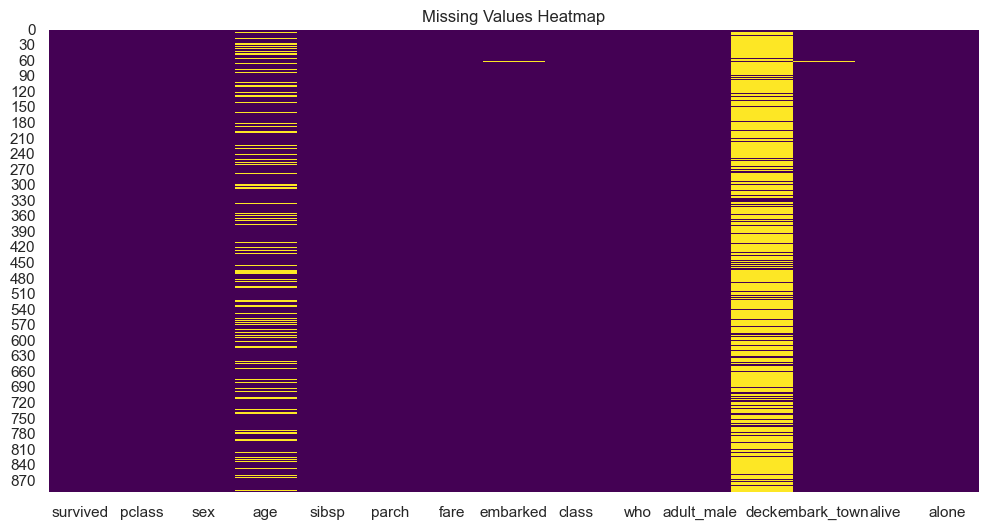

In [6]:
# Visualize missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


## Univariate Analysis - Categorical Variables

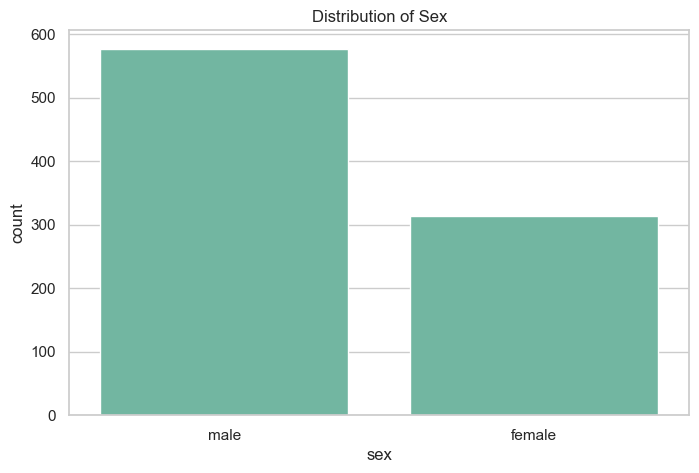

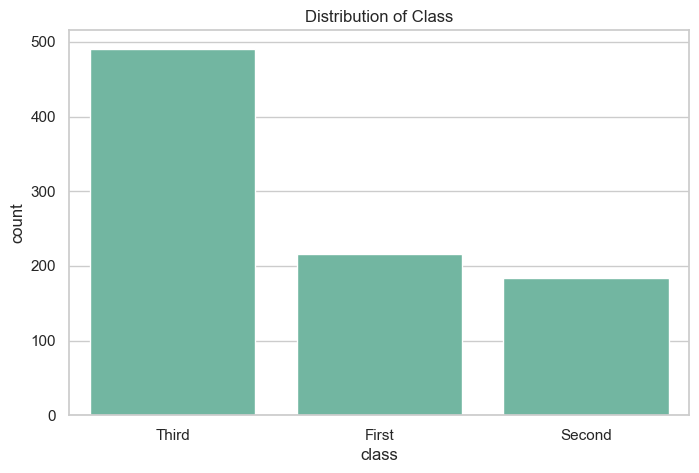

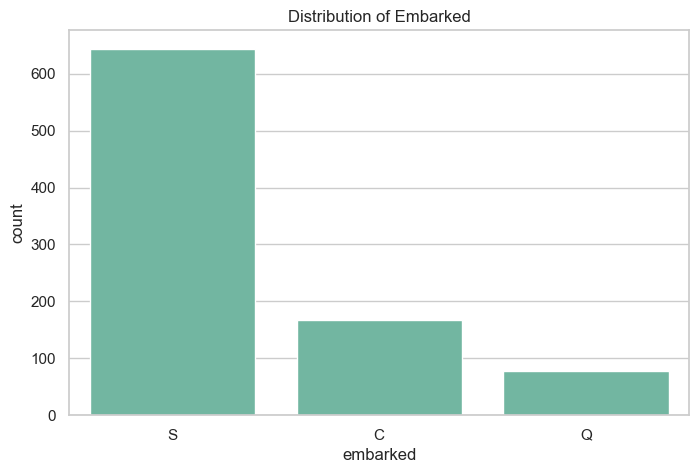

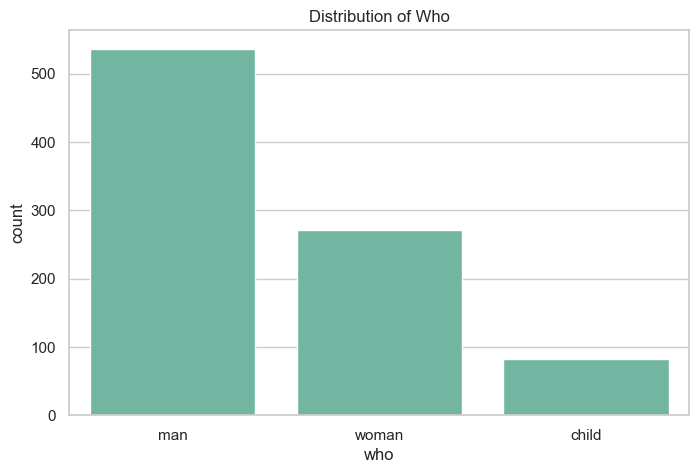

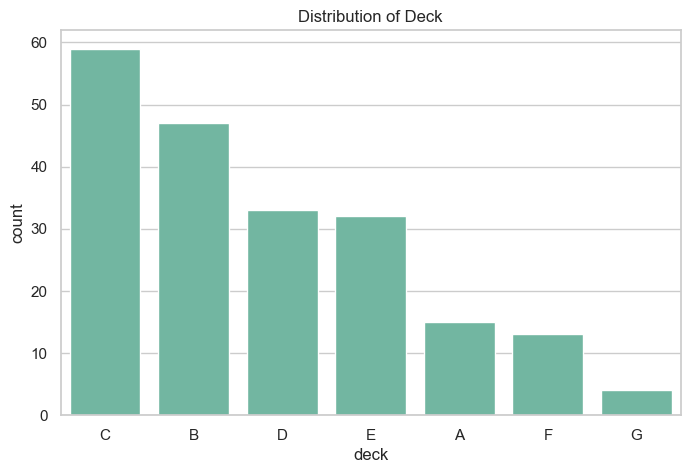

In [7]:
categorical_cols = ["sex", "class", "embarked", "who", "deck"]
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=titanic, x=col, order=titanic[col].value_counts().index)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.show()


## Univariate Analysis - Numerical Variables

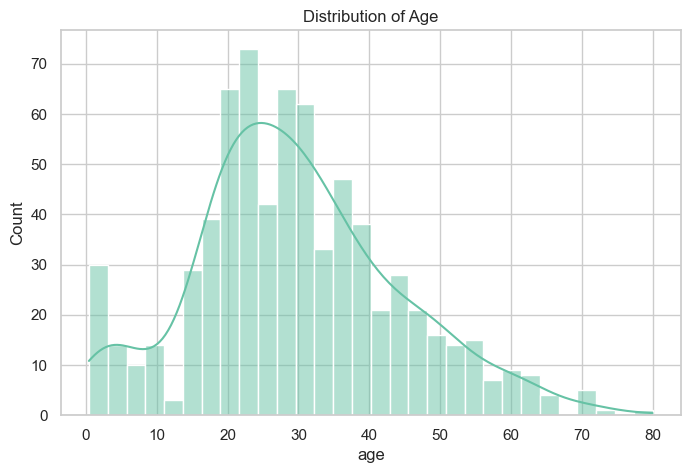

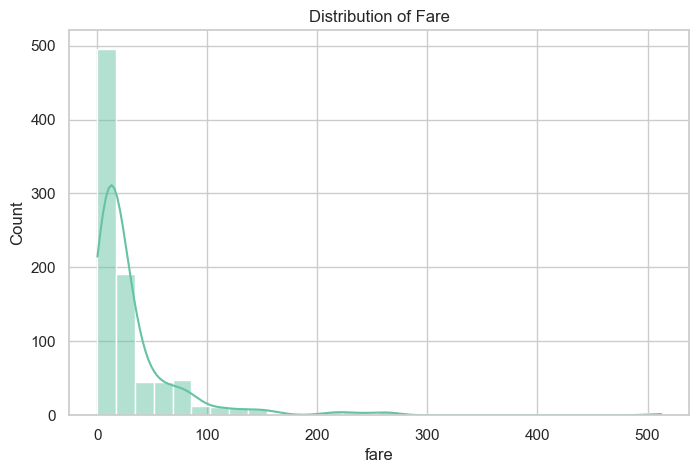

In [8]:
numerical_cols = ["age", "fare"]
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(titanic[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.show()


## Bivariate Analysis - Survival vs Categorical Variables

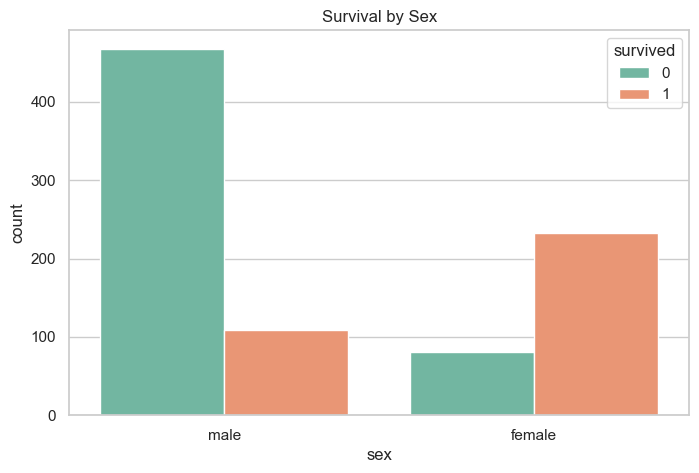

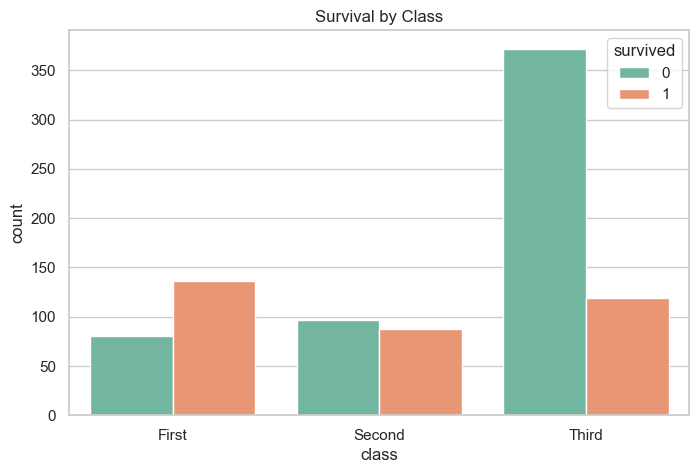

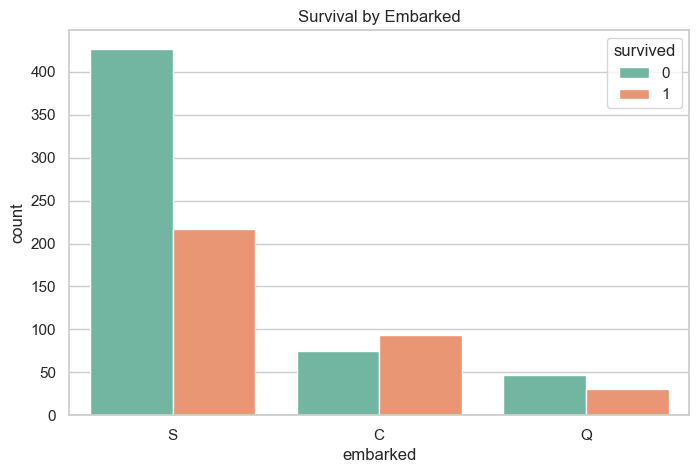

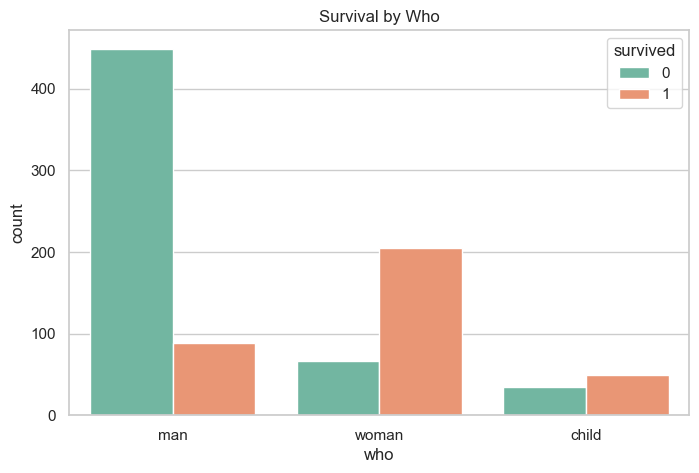

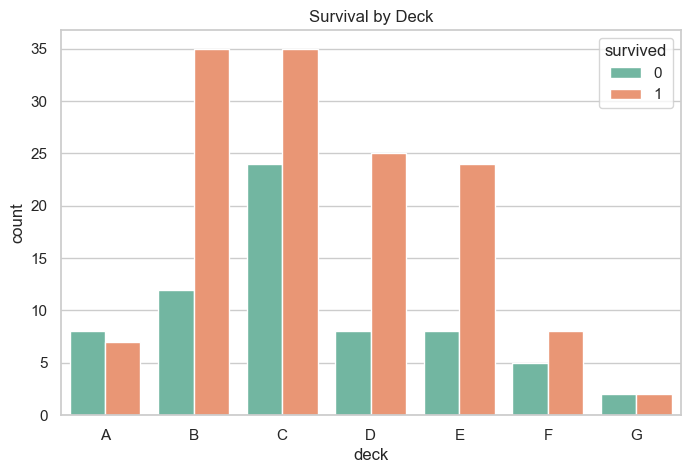

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=titanic, x=col, hue="survived")
    plt.title(f"Survival by {col.capitalize()}")
    plt.show()


## Bivariate Analysis - Survival vs Numerical Variables

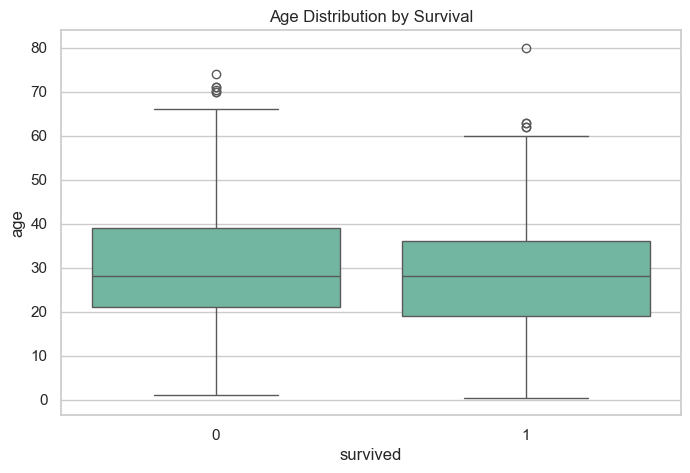

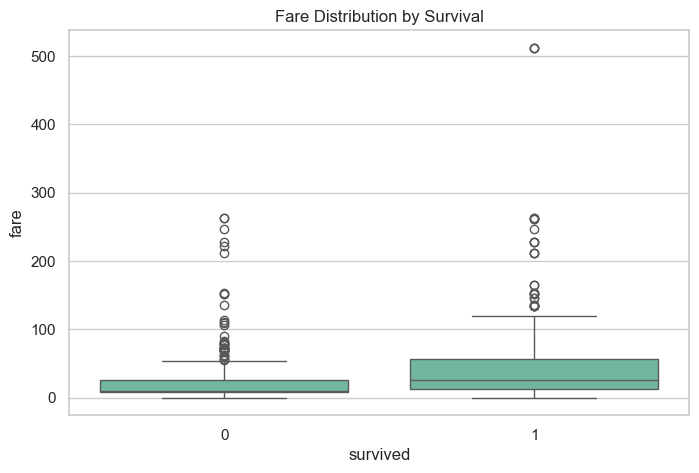

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=titanic, x="survived", y=col)
    plt.title(f"{col.capitalize()} Distribution by Survival")
    plt.show()


## Multivariate Analysis

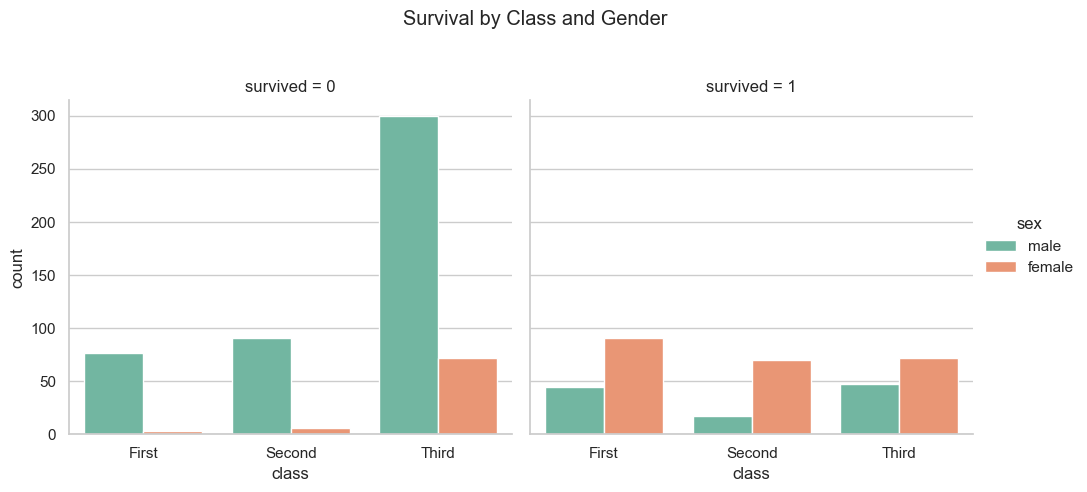

In [11]:
# Survival by class & sex
sns.catplot(data=titanic, x="class", hue="sex", col="survived", kind="count", height=5, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Class and Gender")
plt.show()


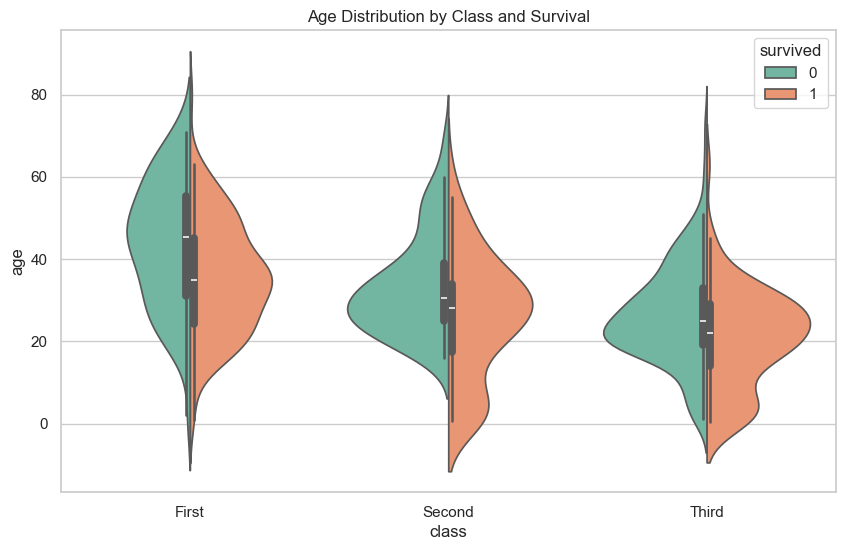

In [12]:
# Survival by age & class
plt.figure(figsize=(10,6))
sns.violinplot(data=titanic, x="class", y="age", hue="survived", split=True)
plt.title("Age Distribution by Class and Survival")
plt.show()


## Outlier Detection

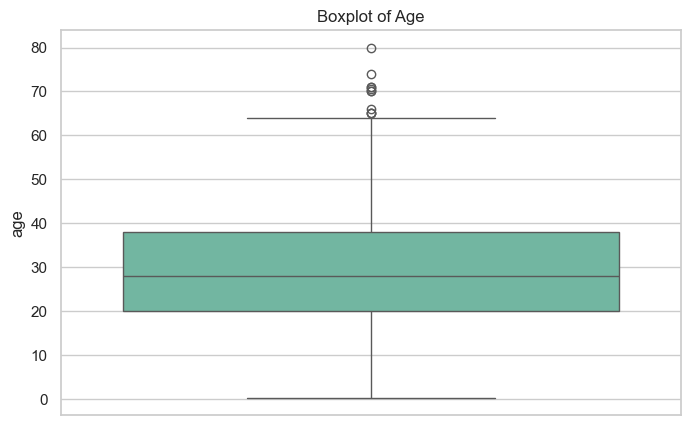

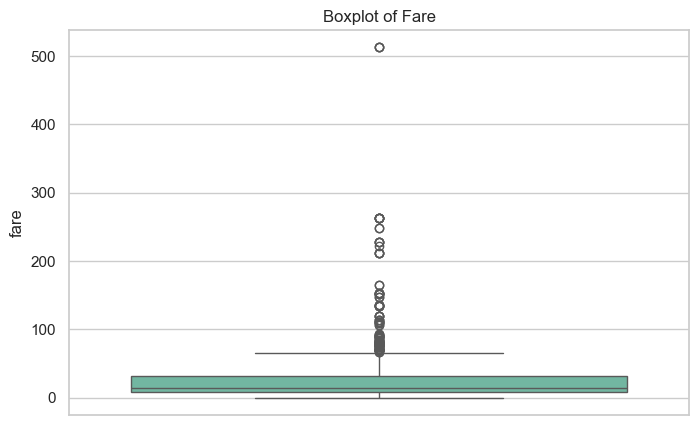

In [13]:
# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=titanic, y=col)
    plt.title(f"Boxplot of {col.capitalize()}")
    plt.show()


## Correlation Analysis

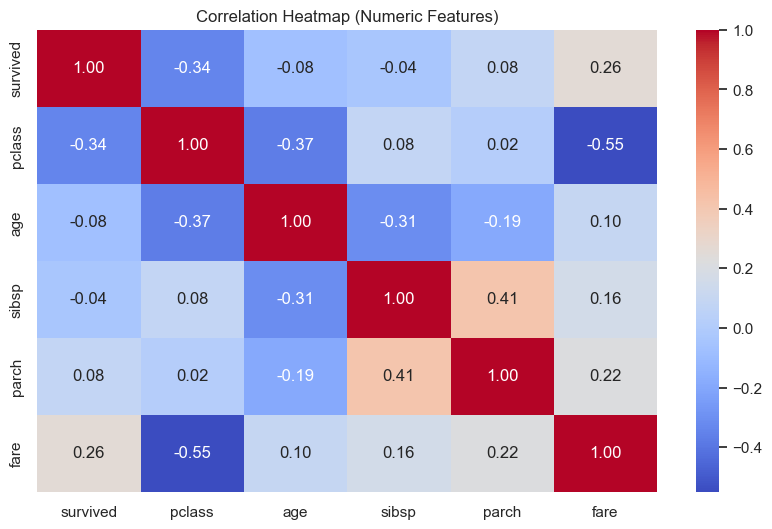

In [15]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(titanic.select_dtypes(include=['number']).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Key Insights and Observations

- **Gender**: Females had a much higher survival rate than males.  
- **Class**: 1st-class passengers had better chances of survival compared to 2nd and 3rd.  
- **Age**: Younger passengers, especially children, had slightly better survival odds.  
- **Fare**: Higher fare correlated with survival (wealthier passengers had access to lifeboats).  
- **Embarkation Point**: Passengers from Cherbourg had higher survival rates than others.  

---
